# Business Case: Axis Bank
Axis bank is trying to categorize its customers for better advertising their credit card service and have more number of customers rolling for the service. The Data Science team has been tasked to classify the customers based on their expenditures, family size, age, and marital status.

The column profile looks as follows,

| id | features | description |
| :-: | :-: | :-: |
|01| ID | ID of the Customer |
|02| Gender | Customer is a Male or Female |
|03| Ever_Married | Customer is married or not |
|04| Age | Age of the Customer |
|05| Graduated | Customer has graduated or not |
|06| Profession | Profession of Customer |
|07| Work_Experience | Work Exp of Customer, ranges from (0 - 14) |
|08| Spending_Score | Customer Expenditure scores |
|09| Family_Size | Family size of the Customer, ranges from (1 - 9) |
|10| Var_1 | Categorizing Customers as (Cat_1, Cat_2, Cat_3, Cat_4) |
|11| Segmentation | Categorizing Customers as (A, B, C, D) |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# loading the dataset
df = pd.read_csv("axis_bank.csv")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


Observe that `Segmentation` and `Var_1` say the same thing, hence, either one of them can be dropped.

In [3]:
# dropping "ID" and "Var_1"
df.drop(columns = ["ID", "Var_1"], inplace = True)
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A


In [4]:
df.isna().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Segmentation         0
dtype: int64

Observe that there are null values present in the dataset.

In [5]:
# dropping all the null values
df.dropna(inplace = True)
df.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64

In [6]:
# shape of the data after all the above manipulations
df.shape

(6718, 9)

# EDA

In [7]:
# checking for categorical columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6718 non-null   object 
 1   Ever_Married     6718 non-null   object 
 2   Age              6718 non-null   int64  
 3   Graduated        6718 non-null   object 
 4   Profession       6718 non-null   object 
 5   Work_Experience  6718 non-null   float64
 6   Spending_Score   6718 non-null   object 
 7   Family_Size      6718 non-null   float64
 8   Segmentation     6718 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 524.8+ KB


The categorical columns are,
- Gender
- Ever_married
- Graduated
- Profession
- Spending_Score
- Segmentation

In [8]:
for i in df.columns:
    print(f"Column Name: {i}, Number of unique elements: {df[i].nunique()}")
    print()

Column Name: Gender, Number of unique elements: 2

Column Name: Ever_Married, Number of unique elements: 2

Column Name: Age, Number of unique elements: 67

Column Name: Graduated, Number of unique elements: 2

Column Name: Profession, Number of unique elements: 9

Column Name: Work_Experience, Number of unique elements: 15

Column Name: Spending_Score, Number of unique elements: 3

Column Name: Family_Size, Number of unique elements: 9

Column Name: Segmentation, Number of unique elements: 4



### Which encoding technique to use to encode the target variable `Segmentation`?
One Hot Encoding the target variable would be the best way to go.

Also, since it is a multi-class classification problem, `CategoricalCrossentropy` will be used as the loss function.

In [9]:
# storing the class labels
class_labels = df["Segmentation"]
df = pd.get_dummies(df, columns = ["Segmentation"], dtype = "int16")
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation_A,Segmentation_B,Segmentation_C,Segmentation_D
0,Male,No,22,No,Healthcare,1.0,Low,4.0,0,0,0,1
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,0,1,0,0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,0,1,0,0
5,Male,Yes,56,No,Artist,0.0,Average,2.0,0,0,1,0
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,0,0,1,0


### How to encode the remaining categorical features?
Any of the encoding techniques can be applied. In this instance, OHE is applied.

In [10]:
# separating the features and label
x = df.drop(columns = ["Segmentation_A", "Segmentation_B", "Segmentation_C", "Segmentation_D"])
y = df[["Segmentation_A", "Segmentation_B", "Segmentation_C", "Segmentation_D"]]
x = pd.get_dummies(x, columns = ["Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score"], dtype = "int16")
pd.set_option('display.max_columns', None)
x.head()

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,22,1.0,4.0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
2,67,1.0,1.0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,67,0.0,2.0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0
5,56,0.0,2.0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0
6,32,1.0,3.0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [11]:
# splitting the dataset into train, validation and test set
from sklearn.model_selection import train_test_split

x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 0.1, random_state = 42)
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((5441, 21), (5441, 4), (605, 21), (605, 4), (672, 21), (672, 4))

Observe that 10% of the data is used for validation and testing, the remaining data is used for training.

Also, note that, standardizing the data is important because it helps the algorithm reach the global minima faster.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

# Baseline Model
The model has the following 6 layers,

| layer | description |
| :-: | :-: |
| L1 | Input Layer |
| L2 | Contains 64 Neurons |
| L3 | Contains 32 Neurons |
| L4 | Contains 16 Neurons |
| L5 | Contains 8 Neurons |
| L6 | Output Layer |

ReLU is used as the activation function.

In [13]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# setting the seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [14]:
def baseline_model():
    model = Sequential(
        [
            Dense(64, activation = "relu", kernel_initializer = "glorot_uniform"),
            Dense(32, activation = "relu", kernel_initializer = "glorot_uniform"),
            Dense(16, activation = "relu", kernel_initializer = "glorot_uniform"),
            Dense(8, activation = "relu", kernel_initializer = "glorot_uniform"),
            Dense(4, activation = "sigmoid")
        ]
    )

    return model

model = baseline_model()

`Adam` is used as the optimizer and Precision and Recall are used as metrics (Accuracy is not the correct metric to be used for multi-class classification problem).

In [15]:
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ["precision", "recall"])

# training the model "epochs = 10" and "batch_size = 128"
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 10, batch_size = 128, verbose = 0)

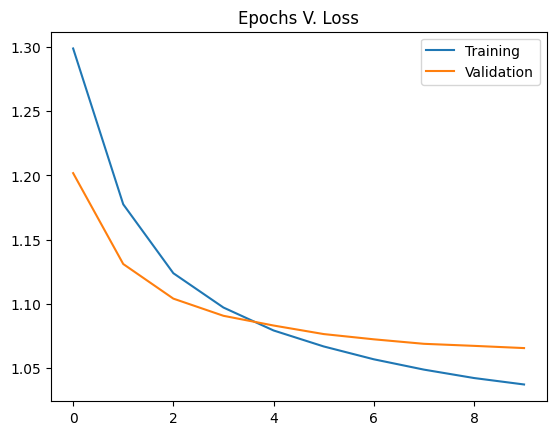

In [16]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, label = "Training")
plt.plot(epochs, val_loss, label = "Validation")
plt.legend()
plt.title("Epochs V. Loss")
plt.show()

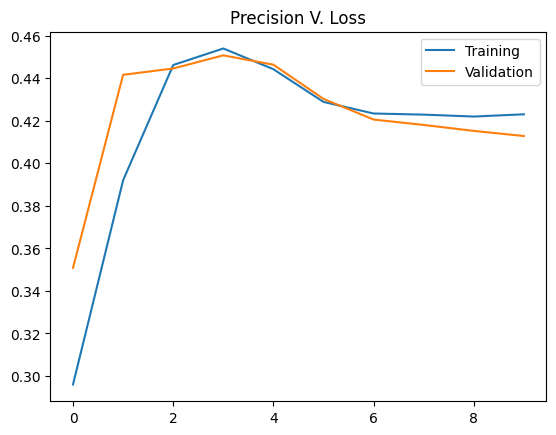

In [17]:
epochs = history.epoch
precision = history.history["precision"]
val_precision = history.history["val_precision"]
plt.plot(epochs, precision, label = "Training")
plt.plot(epochs, val_precision, label = "Validation")
plt.legend()
plt.title("Precision V. Loss")
plt.show()

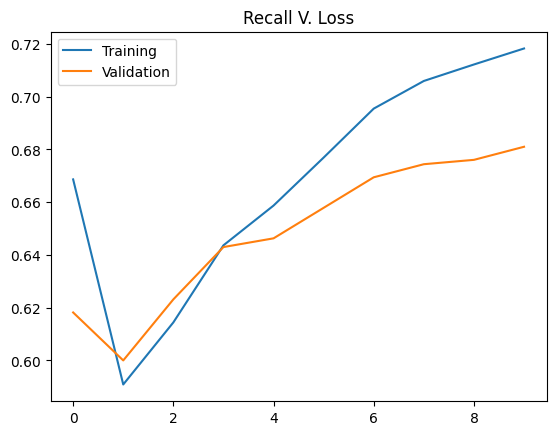

In [18]:
epochs = history.epoch
recall = history.history["recall"]
val_recall = history.history["val_recall"]
plt.plot(epochs, recall, label = "Training")
plt.plot(epochs, val_recall, label = "Validation")
plt.legend()
plt.title("Recall V. Loss")
plt.show()

Observe that after 10 epochs, the model still has high loss. Precision is around 44% and Recall is around 72%.

# Orthogonalization
